In [1]:
import pandas as pd
import numpy as np
import os

# States Data

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'inventory.csv',
 'PIAIC119852 Pandas Assignment.ipynb',
 'README.md',
 'states0.csv',
 'states1.csv',
 'states2.csv',
 'states3.csv',
 'states4.csv',
 'states5.csv',
 'states6.csv',
 'states7.csv',
 'states8.csv',
 'states9.csv',
 '__pycache__']

In [3]:
listOfStates = os.listdir()[4:-1]
cols = ['State', 'TotalPop', 'Hispanic', 'White', 'Black','Native', 'Asian', 'Pacific', 'Income', 'GenderPop']

In [4]:
states = pd.concat([pd.read_csv(f, usecols = cols ) for f in listOfStates])

In [5]:
states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      60 non-null     object
 1   TotalPop   60 non-null     int64 
 2   Hispanic   60 non-null     object
 3   White      60 non-null     object
 4   Black      60 non-null     object
 5   Native     60 non-null     object
 6   Asian      60 non-null     object
 7   Pacific    55 non-null     object
 8   Income     60 non-null     object
 9   GenderPop  60 non-null     object
dtypes: int64(1), object(9)
memory usage: 5.2+ KB


In [6]:
states.head(10)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F


In [7]:
states['Pacific'] = states['Pacific'].fillna('%')

In [8]:
states['Hispanic'] = states['Hispanic'].apply(lambda x: x.rstrip('%'))
states['White'] = states['White'].apply(lambda x: x.rstrip('%'))
states['Black'] = states['Black'].apply(lambda x: x.rstrip('%'))
states['Native'] = states['Native'].apply(lambda x: x.rstrip('%'))
states['Asian'] = states['Asian'].apply(lambda x: x.rstrip('%'))
states['Pacific'] = states['Pacific'].apply(lambda x: x.rstrip('%'))
states['Income'] = states['Income'].apply(lambda x: x.lstrip('$'))
states['MalePop'] = states['GenderPop'].apply(lambda x: x.split('_')[0].rstrip('M'))
states['FemalePop'] = states['GenderPop'].apply(lambda x: x.split('_')[1].rstrip('F'))

states.replace(r'^\s*$', np.nan, regex=True,inplace=True)

In [9]:
states.head(10)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
0,Alabama,4830620,3.7516156462584975,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865,43296.35860306644,2341093M_2489527F,2341093,2489527
1,Alaska,733375,5.909580838323351,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378,70354.74390243902,384160M_349215F,384160,349215
2,Arizona,6641928,29.565921052631502,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833,54207.82095490716,3299088M_3342840F,3299088,3342840
3,Arkansas,2958208,6.215474452554738,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315,41935.63396778917,1451913M_1506295F,1451913,1506295
4,California,38421464,37.291874687968054,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353,67264.78230266465,19087135M_19334329F,19087135,19334329
5,Colorado,5278906,20.78438003220608,69.89557165861504,3.546376811594201,0.5738325281803548,2.661996779388082,NaN,64657.801787164906,2648667M_2630239F,2648667,2630239
0,Colorado,5278906,20.78438003220608,69.89557165861504,3.546376811594201,0.5738325281803548,2.661996779388082,NaN,64657.801787164906,2648667M_2630239F,2648667,2630239
1,Connecticut,3593222,15.604830917874388,67.6770531400966,10.34806763285027,0.12620772946859898,4.021980676328502,0.018599033816425123,76146.5605875153,1751607M_1841615F,1751607,1841615
2,Delaware,926454,8.82476635514019,64.63271028037383,20.743925233644834,0.25981308411214965,3.2686915887850483,NaN,61827.97663551402,448413M_478041F,448413,478041
3,District of Columbia,647484,9.165921787709499,33.103910614525134,51.77653631284915,0.20055865921787713,3.3832402234636865,0.029608938547486034,75466.36363636363,306674M_340810F,306674,340810


In [10]:
states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      60 non-null     object
 1   TotalPop   60 non-null     int64 
 2   Hispanic   60 non-null     object
 3   White      60 non-null     object
 4   Black      60 non-null     object
 5   Native     60 non-null     object
 6   Asian      60 non-null     object
 7   Pacific    55 non-null     object
 8   Income     60 non-null     object
 9   GenderPop  60 non-null     object
 10  MalePop    60 non-null     object
 11  FemalePop  57 non-null     object
dtypes: int64(1), object(11)
memory usage: 6.1+ KB


In [11]:
states['Hispanic'] = states['Hispanic'].astype(float)
states['White'] = states['White'].astype(float)
states['Black'] = states['Black'].astype(float)
states['Native'] = states['Native'].astype(float)
states['Asian'] = states['Asian'].astype(float)
states['Pacific'] = states['Pacific'].astype(float)
states['Income'] = states['Income'].astype(float)
states['MalePop'] = states['MalePop'].astype(float)
states['FemalePop'] = states['FemalePop'].astype(float)

In [12]:
states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      60 non-null     object 
 1   TotalPop   60 non-null     int64  
 2   Hispanic   60 non-null     float64
 3   White      60 non-null     float64
 4   Black      60 non-null     float64
 5   Native     60 non-null     float64
 6   Asian      60 non-null     float64
 7   Pacific    55 non-null     float64
 8   Income     60 non-null     float64
 9   GenderPop  60 non-null     object 
 10  MalePop    60 non-null     float64
 11  FemalePop  57 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 6.1+ KB


In [13]:
states.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093.0,2489527.0
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160.0,349215.0
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3299088.0,3342840.0
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913M_1506295F,1451913.0,1506295.0
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135M_19334329F,19087135.0,19334329.0


In [14]:
states.drop_duplicates(inplace=True)

In [15]:
states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 5
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      51 non-null     object 
 1   TotalPop   51 non-null     int64  
 2   Hispanic   51 non-null     float64
 3   White      51 non-null     float64
 4   Black      51 non-null     float64
 5   Native     51 non-null     float64
 6   Asian      51 non-null     float64
 7   Pacific    47 non-null     float64
 8   Income     51 non-null     float64
 9   GenderPop  51 non-null     object 
 10  MalePop    51 non-null     float64
 11  FemalePop  49 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 5.2+ KB


In [16]:
states['Pacific'].fillna(states['Pacific'].mean(),inplace=True)

In [17]:
states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 5
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      51 non-null     object 
 1   TotalPop   51 non-null     int64  
 2   Hispanic   51 non-null     float64
 3   White      51 non-null     float64
 4   Black      51 non-null     float64
 5   Native     51 non-null     float64
 6   Asian      51 non-null     float64
 7   Pacific    51 non-null     float64
 8   Income     51 non-null     float64
 9   GenderPop  51 non-null     object 
 10  MalePop    51 non-null     float64
 11  FemalePop  49 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 5.2+ KB


In [18]:
states[states['FemalePop'].isnull()]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
5,Maryland,5930538,8.472498,52.679050,30.677754,0.203096,5.325414,0.036285,78765.400725,2872643M_F,2872643.0,NaN
1,Montana,1014699,3.268889,86.415556,0.429259,7.060741,0.570370,0.072222,47645.682836,510163M_F,510163.0,NaN


In [19]:
states['FemalePop'] = states['TotalPop'] - states['MalePop']

In [20]:
states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 5
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      51 non-null     object 
 1   TotalPop   51 non-null     int64  
 2   Hispanic   51 non-null     float64
 3   White      51 non-null     float64
 4   Black      51 non-null     float64
 5   Native     51 non-null     float64
 6   Asian      51 non-null     float64
 7   Pacific    51 non-null     float64
 8   Income     51 non-null     float64
 9   GenderPop  51 non-null     object 
 10  MalePop    51 non-null     float64
 11  FemalePop  51 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 5.2+ KB


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

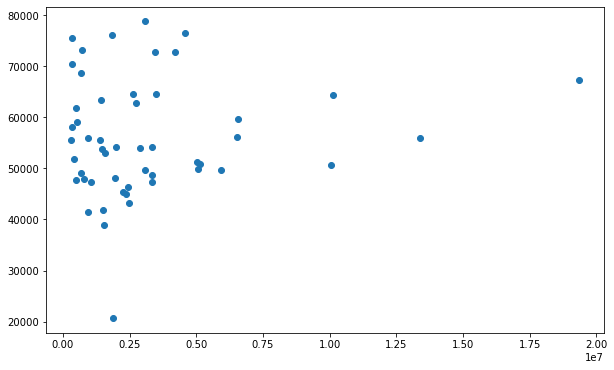

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(x = states['FemalePop'], y = states['Income'])

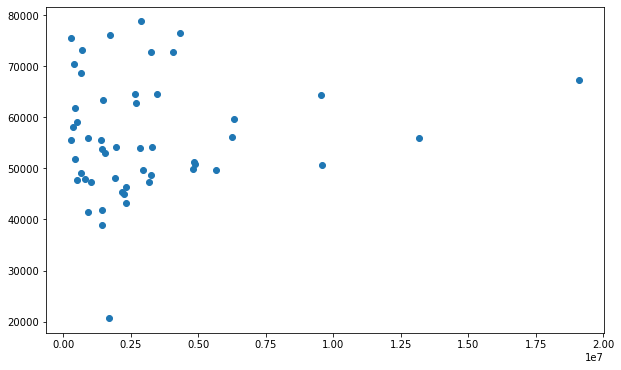

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(x = states['MalePop'], y = states['Income'])

(array([20., 12.,  9.,  3.,  1.,  2.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1.29090909,  6.17104233, 11.05117557, 15.9313088 , 20.81144204,
        25.69157528, 30.57170852, 35.45184175, 40.33197499, 45.21210823,
        50.09224147, 54.97237471, 59.85250794, 64.73264118, 69.61277442,
        74.49290766, 79.37304089, 84.25317413, 89.13330737, 94.01344061,
        98.89357384]),
 <a list of 20 Patch objects>)

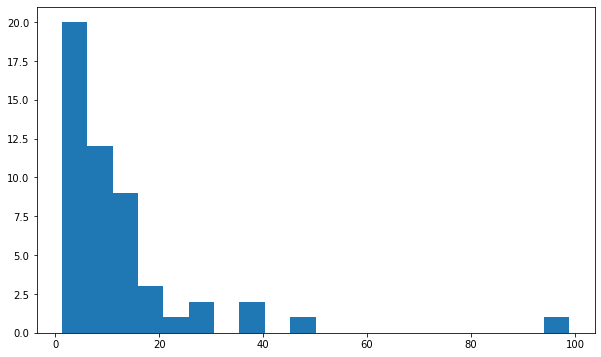

In [24]:
plt.figure(figsize=(10,6))
plt.hist(states['Hispanic'],bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1080B6F98>,
      dtype=object)

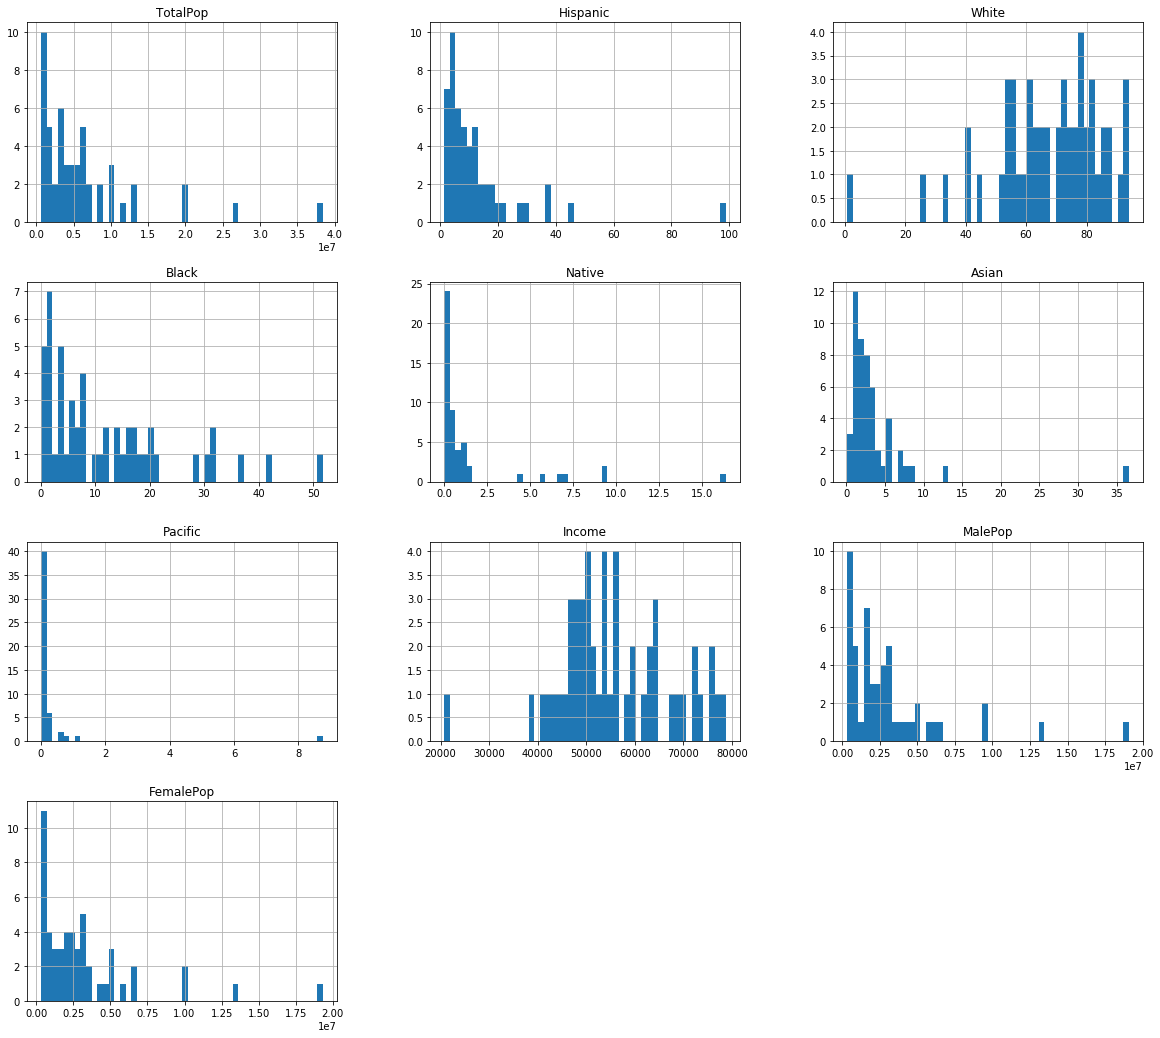

In [25]:
states.hist(bins=50,figsize=(20,18))

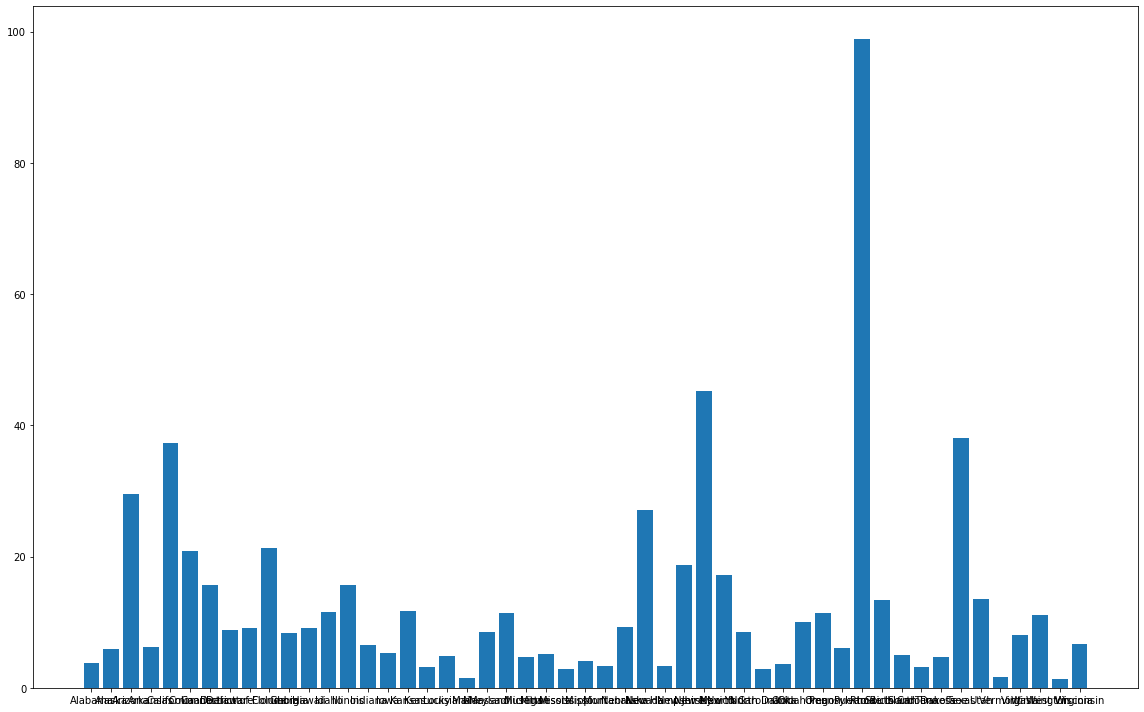

In [26]:
plt.figure(figsize=(16,10))
plt.bar(states['State'],states['Hispanic'])
plt.tight_layout()

# Petal Power Inventory Data

In [27]:
inventory = pd.read_csv('inventory.csv')

In [28]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   location             29 non-null     object 
 1   product_type         29 non-null     object 
 2   product_description  29 non-null     object 
 3   quantity             29 non-null     int64  
 4   price                29 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


In [29]:
inventory.head(10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [30]:
statenIsland = inventory[inventory['location'] == 'Staten Island']

In [31]:
product_request = statenIsland['product_type'].unique()

In [32]:
seed_request = inventory[(inventory['location'] == 'Brooklyn') & (inventory['product_type'] == 'seeds')]['product_description']
print(seed_request)

10         daisy
11    calla lily
12        tomato
Name: product_description, dtype: object


In [33]:
inventory['in_stock'] = inventory['quantity'].apply(lambda x: True if x>0 else False)

In [34]:
inventory.head()

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False


In [35]:
inventory['total_value'] = inventory['price'] * inventory['quantity'] 

In [36]:
inventory.head()

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00


In [37]:
combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)

In [38]:
inventory['full_description']  = inventory.apply(combine_lambda,axis='columns')

In [39]:
inventory.head()

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow


In [40]:
inventory['full_description'].iloc[0]

'seeds - daisy'